# Linear Regression
## Bike Sharing Case Study


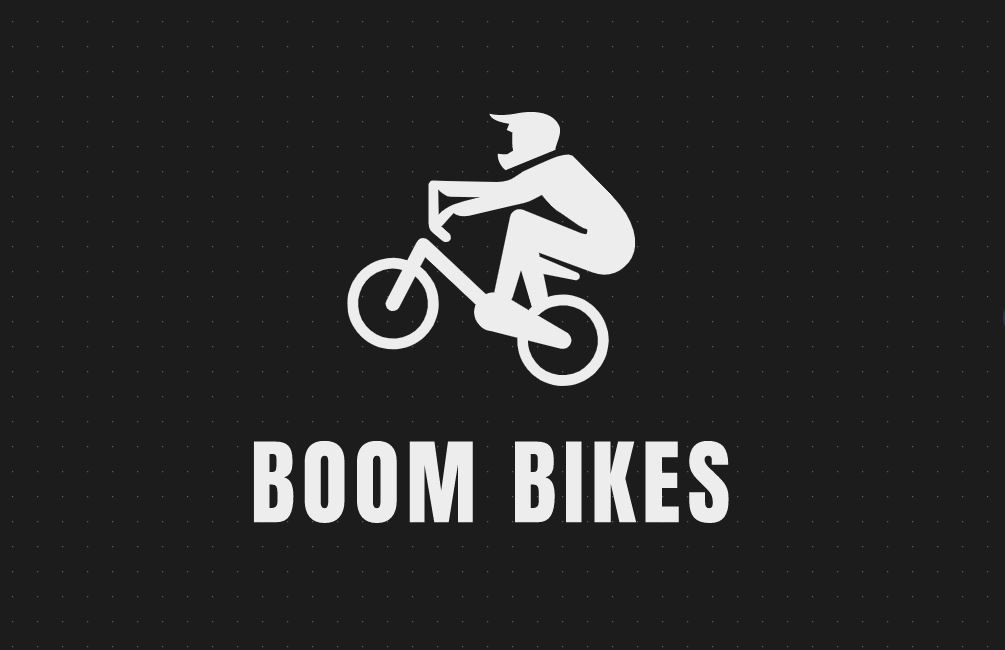

### Problem Statement
#### A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.
#### The company wants to know:
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands.

### Business Objectives:
Required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Dataset Description
The dataset provided contains all the information of the bike registered and casual users along with the other variables impactiong the daily rent.

### 1.1 Importing modules

In [1306]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

### 1.2 Importing statsmodel to get the detailed statistics summary of the trained model

In [1307]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

### 1.3 Importing sklearn required modules for performing Linear Regression

In [1308]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

### Step 2 - Dataset Description & Basic Checks
The dataset provided contains all the information of the bike registered and casual users along with the other variables impactiong the daily rent.
### 2.1 Read Data

In [1309]:
# read the csv
df = pd.read_csv(r'C:\Users\shagu\Downloads\Linear Regression Assignment\day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### 2.2 Data Quality Check

In [1310]:
df.shape

(730, 16)

In [1311]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


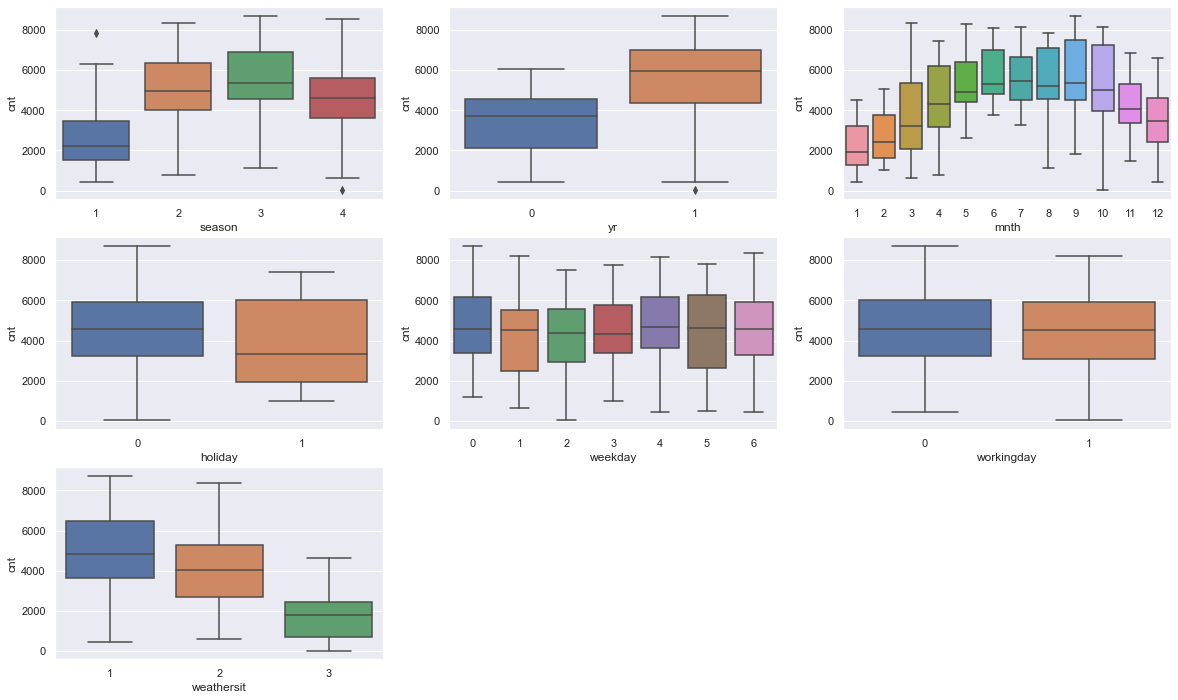

In [1312]:
#visualise - categorical variables
plt.figure(figsize=(20,12))
plt.subplot(3,3,1)
sns.boxplot(x='season',y='cnt', data=df)
plt.subplot(3,3,2)
sns.boxplot(x='yr',y='cnt', data=df)
plt.subplot(3,3,3)
sns.boxplot(x='mnth',y='cnt', data=df)
plt.subplot(3,3,4)
sns.boxplot(x='holiday',y='cnt', data=df)
plt.subplot(3,3,5)
sns.boxplot(x='weekday',y='cnt', data=df)
plt.subplot(3,3,6)
sns.boxplot(x='workingday',y='cnt', data=df)
plt.subplot(3,3,7)
sns.boxplot(x='weathersit',y='cnt', data=df)
plt.show()

### 3. Data Cleaning & Preparation

- All the columns contains 0 null values
- dteday columns needs to get converted into datatime format as well as the name of the column should also be standardised
- instant columns cantains the pre-populated index, we can drop this column as it is of no use
- Season and year need to be converted into its actuall categorical value at first

In [1313]:
# converting dteday columns to datetime
df.dteday = pd.to_datetime(df['dteday'])

In [1314]:
# dropping instant column
df.drop('instant', axis=1, inplace=True)

### 3.1 Maping the numerical values to its respective description

- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : (1:Jan,2:Feb,3:Mar,...,12:Dec)
- weekdays : days(1:'Monday',2:'Tuesday',3:'Wednesday',....,0:'Sunday')
- weathersit : climate(1:'Clear', 2:'Cloudy', 3:'LightSnow Rain', 4:'HeavysSnow Rain')

### weathersit :

- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog



In [1315]:
# Year
df.yr = df.yr.map({1: 2019, 0 : 2018})
# Season
df.season = df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
# Month
df.mnth = df.mnth.map({1:'Jan',2:'Feb',3:'March',4:'April',
                            5:'May',6:'June',7:'July',8:'Aug',9:'Sep',
                            10:'Oct',11:'Nov',12:'Dec'})
# weekday
df.weekday =df.weekday.map({1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thrusday',
                                  5:'Friday',6:'Saturday',0:'Sunday',})
# weathersit
df.weathersit =df.weathersit.map({1:'Clear', 2:'Cloudy', 3:'LightSnow Rain', 4:'HeavysSnow Rain'})

In [1316]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2018-01-01,spring,2018,Jan,0,Monday,1,Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2018-02-01,spring,2018,Jan,0,Tuesday,1,Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2018-03-01,spring,2018,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2018-04-01,spring,2018,Jan,0,Thrusday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2018-05-01,spring,2018,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1317]:
# Changing the columns name as desired
df.rename(columns = {'dteday':'date','yr':'year','mnth':'month','hum':'humidity','cnt':'count'}, inplace = True)

In [1318]:
# re-check the dataset details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        730 non-null    datetime64[ns]
 1   season      730 non-null    object        
 2   year        730 non-null    int64         
 3   month       730 non-null    object        
 4   holiday     730 non-null    int64         
 5   weekday     730 non-null    object        
 6   workingday  730 non-null    int64         
 7   weathersit  730 non-null    object        
 8   temp        730 non-null    float64       
 9   atemp       730 non-null    float64       
 10  humidity    730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  casual      730 non-null    int64         
 13  registered  730 non-null    int64         
 14  count       730 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(6), object(4)
memory usage: 85.7+ 

In [1319]:
# Statistical Summary
df.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2018.500000,0.028767,0.690411,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,0.500343,0.167266,0.462641,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,2018.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2018.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,2018.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,2019.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,2019.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### 3.2 Data Exploration

In [1320]:
# to check the repetative date in the dataset
df.groupby('date').agg({'date':'count'}).shape

(730, 1)

In [1321]:
# Summarizing the dataset
print('dataset starting date = {}'.format(df.date.min().date()))
print('dataset ending date = {}'.format(df.date.max().date()))
s = df.date.min().date()
e = df.date.max().date()
print("No's of days between max and min date = {}".format((e-s).days))

dataset starting date = 2018-01-01
dataset ending date = 2019-12-31
No's of days between max and min date = 729


In [1322]:
total_days = df.groupby(['weathersit','workingday']).agg({'workingday':'count'})
total_days.rename(columns={'workingday':'count of days'}, inplace = True)

In [1323]:
total_days.pivot_table(index=['weathersit','workingday'],
               margins=True,
               margins_name='total',  # defaults to 'All'
               aggfunc=sum)
# total_days

count of days
weathersit     workingday               
Clear          0                     136
               1                     327
Cloudy         0                      86
               1                     160
LightSnow Rain 0                       4
               1                      17
total                                730

 Earlier while looking into the unique values of the weather situation we stated that the riders don't use the bike rental service during storm or heavy Rain which seems to be right as expected but on looking to the total no's of days on which the bike has been rented we can say that the firm never faced the Heavy Rain or storm situation. 
 So, we don't have enough data for the heavy rain situation to conclude any statement but ideally the providers should avoid renting out their bikes during this situation also take an additional steps to face this situation in the future


### Plot the spread of the renters data across different weather using catplot

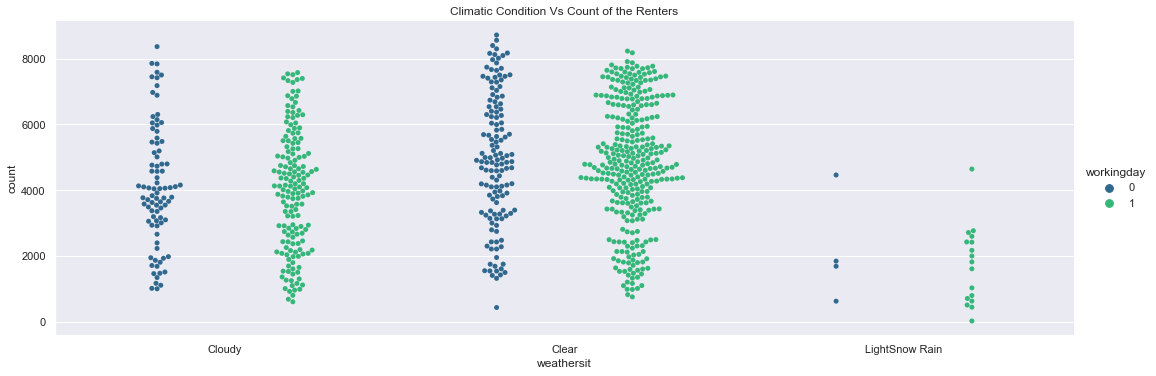

In [1324]:
sns.set_theme()
sns.catplot(x="weathersit", y="count", hue="workingday",
                   data=df, kind= 'swarm',height=5, aspect=3, palette="viridis", dodge=True)
plt.title('Climatic Condition Vs Count of the Renters')
plt.show()

##### From above plot we can state that during clear weather the numbers of riders renting the Bikes are more as compare to the Mist/Cloudy weather

- We can see that the riders use to access the services more during Mist/cloudy or Clear weather
- During light snow/light rain and the user won't prefer to avail the services if it's non-working day but during working days they do have rented the bike a very few nos of times

##### Now let's analysed on which week day the sevices has been used more with in combination of weathear


In [1325]:
#  Though we have seen the spread of the data lets also explore its density 
df.weathersit.value_counts(normalize=True)

Clear             0.634247
Cloudy            0.336986
LightSnow Rain    0.028767
Name: weathersit, dtype: float64

##### Though the spread across the weekdays was seemed to be the same but the density and user preference lies towards Clear weather

In [1326]:
df.weekday.value_counts(normalize=True).apply(lambda x:str(round(x*100,2))+'%')

Monday       14.38%
Tuesday      14.38%
Sunday       14.25%
Friday       14.25%
Thrusday     14.25%
Wednesday    14.25%
Saturday     14.25%
Name: weekday, dtype: object

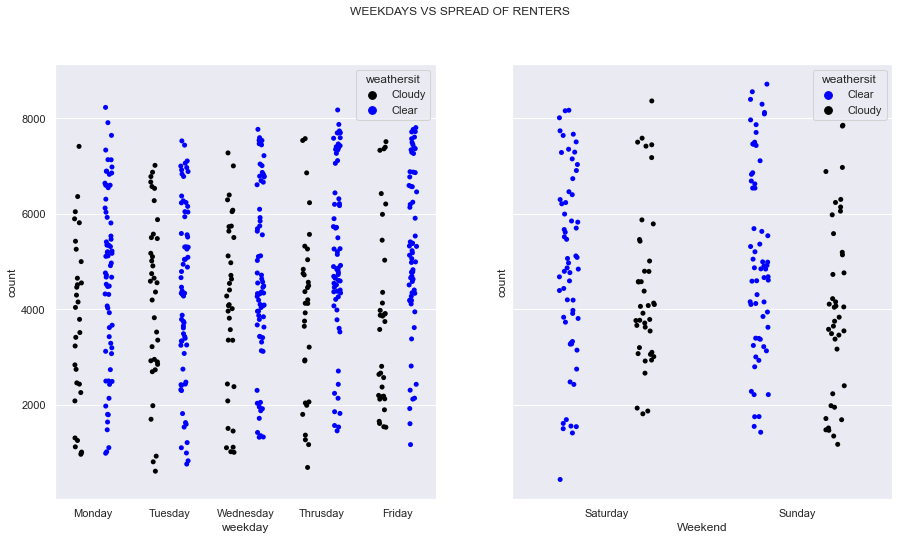

In [1327]:
%matplotlib inline

fig, axes = plt.subplots(1, 2,sharey=True,figsize=(15,8))
plt.suptitle('WEEKDAYS VS SPREAD OF RENTERS')


sns.stripplot(x="weekday", y="count", hue='weathersit',
                   data=df[(df['weathersit']!= 'LightSnow Rain') & (~df['weekday'].isin(['Saturday', 'Sunday']))], 
              palette=['black' , 'blue'], dodge=True,ax=axes[0])


sns.stripplot(x="weekday", y="count", hue='weathersit',
                   data=df[(df['weathersit']!= 'LightSnow Rain') & (df.weekday.isin (['Saturday', 'Sunday']))],
              palette=['blue','black'], dodge=True ,ax=axes[1])
plt.xlabel('Weekend')

plt.show()

There is not significant increase in the numbers but if we compare the weekends as compare to any days of the weekdays excluding friday(day=5) the numbers of the user renting the bikes have been increase and among weekdays the friday is the most populous day irrespective of the weather

#### The count variable has been derived by summing up the registered users and the casual users. So, lets see the contribution of each class of users

In [1328]:
rented_user = df.groupby('month', as_index =False,sort=False).agg({'count':'sum','registered':'sum','casual':'sum'})
rented_user

,month,count,registered,casual
0,Jan,134933,122891,12042
1,Feb,149518,134620,14898
2,March,228920,184476,44444
3,April,269094,208292,60802
4,May,331686,256401,75285
5,June,346342,272436,73906
6,July,344948,266791,78157
7,Aug,351194,279155,72039
8,Sep,345991,275668,70323
9,Oct,322352,262592,59760


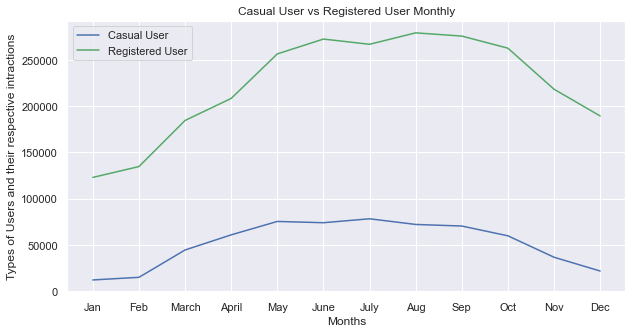

In [1329]:
plt.figure(figsize=(10,5))
sns.lineplot(rented_user.month,rented_user.casual,color='b',label='Casual User',sort=False)
sns.lineplot(rented_user.month,rented_user.registered,color='g',dashes='-',label='Registered User',sort=False)
plt.ylabel('Types of Users and their respective intractions')
plt.xlabel('Months')
plt.title('Casual User vs Registered User Monthly')
plt.show()

Clearly, registered users are more frequent to rent Boombikes as compared to casual users.
Also, firm can increase the price margin for non-registered user to make extra profit.


### Plot the renters density per month using box and violin plot

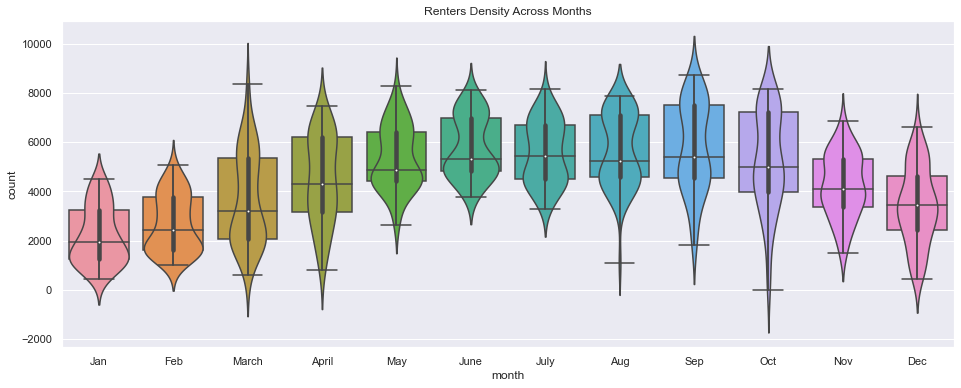

In [1330]:
plt.figure(figsize=(16,6))
# sns.lineplot(x="mnth", y="cnt", data=df, color='red')
sns.violinplot(x="month", y="count", data=df)
sns.boxplot(x="month", y="count", data=df)
plt.title("Renters Density Across Months")
plt.show()

The graph tail representing the lower density of the renters and the head showing the higher density of the renters and more stable during the month of (June, July).

From May to Oct has high median while in Jan it is lowest then it is gradually increasing till july then again going down in winter months. It means renters count increases in months with higher temperature.


### 3.3 Explorating the correlation between different numerical features

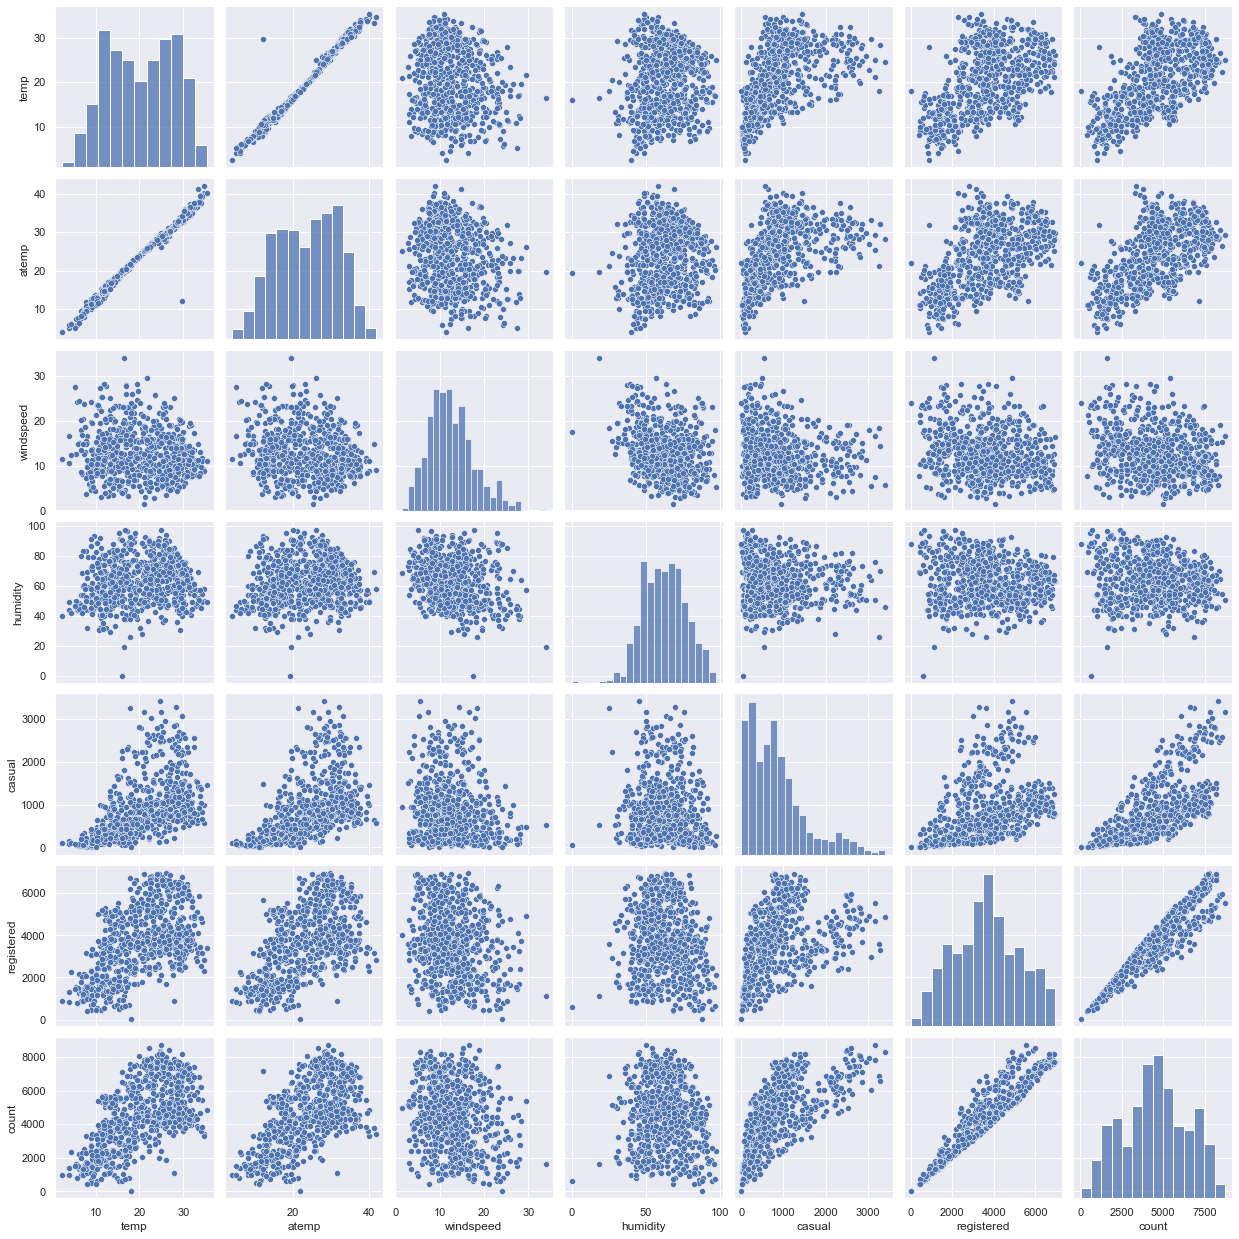

In [1331]:
# Pairplot the numeric vaiables
sns.pairplot(df, vars=["temp",'atemp', 'windspeed',"humidity",'casual','registered','count'], hue_order='Set1')
plt.show()

- atemp and temp are highly correlated
- casual and have good correlation with count variable as the count gets derived on summing the casual and registered Users value

#### Let's analyzed for the Year variable and how the behaviour gets changed across it

Pairplot for numeric variables

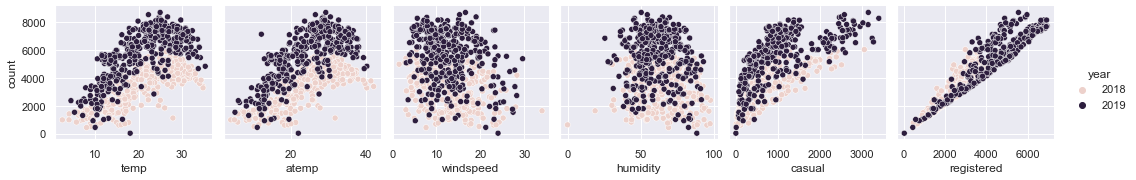

In [1332]:
sns.pairplot(df, x_vars=["temp",'atemp', 'windspeed',"humidity",'casual','registered'],y_vars=['count'], hue='year')
plt.show()

We can infer from above plot that the no's of casual users have increased compared to the previous year while the registered users shows slightly downward trend as compared to last year.

### Correlation of Heat Map

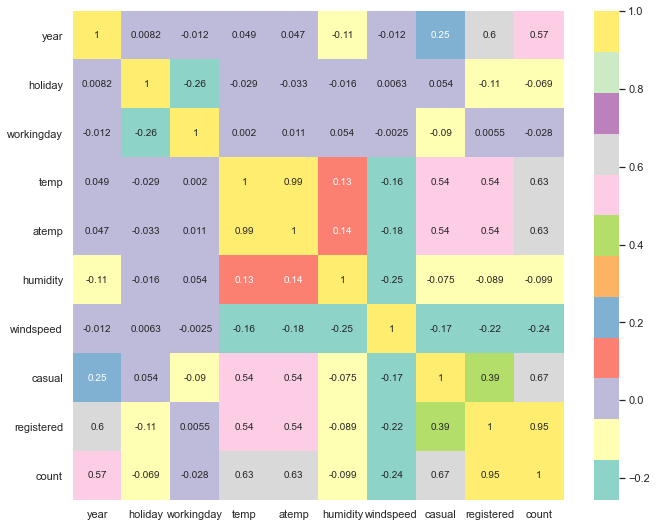

In [1333]:
corr = df.corr()
# Generate a mask for the upper triangle
# mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap='Set3', annot = True)

plt.show()


Inference

  - temp and atemp both have the same correlation coefficient as well as they are highly correlated to each other. So, it needs to be analyzed and need to drop one variable while building the model to avoid multicolinearity using VIF and p-value.
  - year, casual users and registered users among variables are positively correlated to the count variable
  - Also, the target variable gets derived from the casual and registered users. So moving forward, we will not consider these columns.

### 3.4 Drop the unnecessary variables from the dataset

We can see the dataset has some variables that are not required. So, we can drop date, casual, registered and atemp.

In [1334]:
df = df.drop(['date','casual', 'registered','atemp'], axis=1)
df.head()       

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,spring,2018,Jan,0,Monday,1,Cloudy,14.110847,80.5833,10.749882,985
1,spring,2018,Jan,0,Tuesday,1,Cloudy,14.902598,69.6087,16.652113,801
2,spring,2018,Jan,0,Wednesday,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,2018,Jan,0,Thrusday,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,2018,Jan,0,Friday,1,Clear,9.305237,43.6957,12.522300,1600


### 4. Creating dummy variables for string columns

In [1335]:
print('The columns which we have are')
print(list(df.columns))

The columns which we have are
['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'humidity', 'windspeed', 'count']


#### 4.1 Introduction of Dummy Variables

   - columns [ 'season', 'Year', 'month', 'weekday','weathersit' ] contains a categorical string variable
   - We need to convert these variables into integers according to their levels
   - For this, we will use something called dummy variables.

In [1336]:
print('Checking the levels of each columns')
print(df.select_dtypes(include='object').nunique().sort_values())

Checking the levels of each columns
weathersit     3
season         4
weekday        7
month         12
dtype: int64


 Total Dummy Variables will be created as : ((3-1)+(4-1)+(7-1)+(12-1)) = 22

In [1337]:
# Season
dummy = pd.get_dummies(df[['season','month','weekday','weathersit']],drop_first = True)
dummy.head()

,season_spring,season_summer,season_winter,month_Aug,month_Dec,month_Feb,month_Jan,month_July,month_June,month_March,...,month_Oct,month_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Cloudy,weathersit_LightSnow Rain
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1338]:
df.year = df.year.map({2018:0,2019:1})
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,spring,0,Jan,0,Monday,1,Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Tuesday,1,Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Wednesday,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Thrusday,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Friday,1,Clear,9.305237,43.6957,12.522300,1600


#### 4.2 Concating the dummy variables with dataset

In [1339]:
df_model = pd.concat((df, dummy), axis=1)
df_model.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,...,month_Oct,month_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Cloudy,weathersit_LightSnow Rain
0,spring,0,Jan,0,Monday,1,Cloudy,14.110847,80.5833,10.749882,...,0,0,1,0,0,0,0,0,1,0
1,spring,0,Jan,0,Tuesday,1,Cloudy,14.902598,69.6087,16.652113,...,0,0,0,0,0,0,1,0,1,0
2,spring,0,Jan,0,Wednesday,1,Clear,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,Jan,0,Thrusday,1,Clear,8.200000,59.0435,10.739832,...,0,0,0,0,0,1,0,0,0,0
4,spring,0,Jan,0,Friday,1,Clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,0,0,0


In [1340]:
df_model.drop(['season', 'month', 'weekday', 'weathersit'], axis =1, inplace = True)
df_model.head()

,year,holiday,workingday,temp,humidity,windspeed,count,season_spring,season_summer,season_winter,...,month_Oct,month_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Cloudy,weathersit_LightSnow Rain
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### 5. Train-Test Split Data (70%-30%)

In [1341]:
df_model_train, df_model_test = train_test_split(df_model, train_size = 0.7, test_size = 0.3, random_state = 100)

In [1342]:
print('Shape of Train Dataset {}'.format(df_model_train.shape))
df_model_train.head()

Shape of Train Dataset (510, 29)


,year,holiday,workingday,temp,humidity,windspeed,count,season_spring,season_summer,season_winter,...,month_Oct,month_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Cloudy,weathersit_LightSnow Rain
653,1,0,1,19.201653,55.8333,12.208807,7534,0,0,1,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,29.246653,70.4167,11.083475,7216,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,16.980847,62.1250,10.792293,4066,1,0,0,...,0,0,0,0,1,0,0,0,1,0
728,1,0,1,10.489153,48.3333,23.500518,1796,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,15.443347,48.9583,8.708325,4220,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [1343]:
print('Shape of Test Dataset {}'.format(df_model_test.shape))
df_model_test.head()

Shape of Test Dataset (219, 29)


,year,holiday,workingday,temp,humidity,windspeed,count,season_spring,season_summer,season_winter,...,month_Oct,month_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Cloudy,weathersit_LightSnow Rain
184,0,1,0,29.793347,63.7917,5.459106,6043,0,0,0,...,0,0,0,0,0,0,0,1,1,0
535,1,0,1,32.082500,59.2083,7.625404,6211,0,1,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,19.270000,81.2917,13.250121,2659,0,0,1,...,1,0,0,1,0,0,0,0,1,0
221,0,0,1,31.433347,42.4167,13.417286,4780,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,29.315000,30.5000,19.583229,4968,0,1,0,...,0,0,0,1,0,0,0,0,0,0


### 6. Feature Scaling 
If a feature in the dataset is big in scale compared to others then in algorithms where Euclidean distance is measured this big scaled feature becomes dominating and needs to be normalized.

In [1344]:
scaler = MinMaxScaler()
variables = ['temp','humidity', 'windspeed']
df_model_train[variables] =scaler.fit_transform(df_model_train[variables])

In [1345]:
df_model_train.head()

,year,holiday,workingday,temp,humidity,windspeed,count,season_spring,season_summer,season_winter,...,month_Oct,month_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Cloudy,weathersit_LightSnow Rain
653,1,0,1,0.509887,0.575354,0.300794,7534,0,0,1,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.725633,0.264686,7216,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,4066,1,0,0,...,0,0,0,0,1,0,0,0,1,0
728,1,0,1,0.245101,0.498067,0.663106,1796,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,4220,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [1346]:
print('Statistical Summary')
df_model_train.describe()

Statistical Summary


,year,holiday,workingday,temp,humidity,windspeed,count,season_spring,season_summer,season_winter,...,month_Oct,month_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Cloudy,weathersit_LightSnow Rain
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.650369,0.320768,4486.382353,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.343137,0.029412
std,0.500429,0.157763,0.453386,0.225844,0.145882,0.169797,1952.158739,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,3120.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,4530.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,5973.500000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8714.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


As we can see that the maximum value for all the variables is 1 while min value is 0. So, the whole feature range are now in between 0 to 1 and it denotes that all features are on the same scale.

#### 6.2 Let's check the correlation coefficients to see which variables are highly correlated

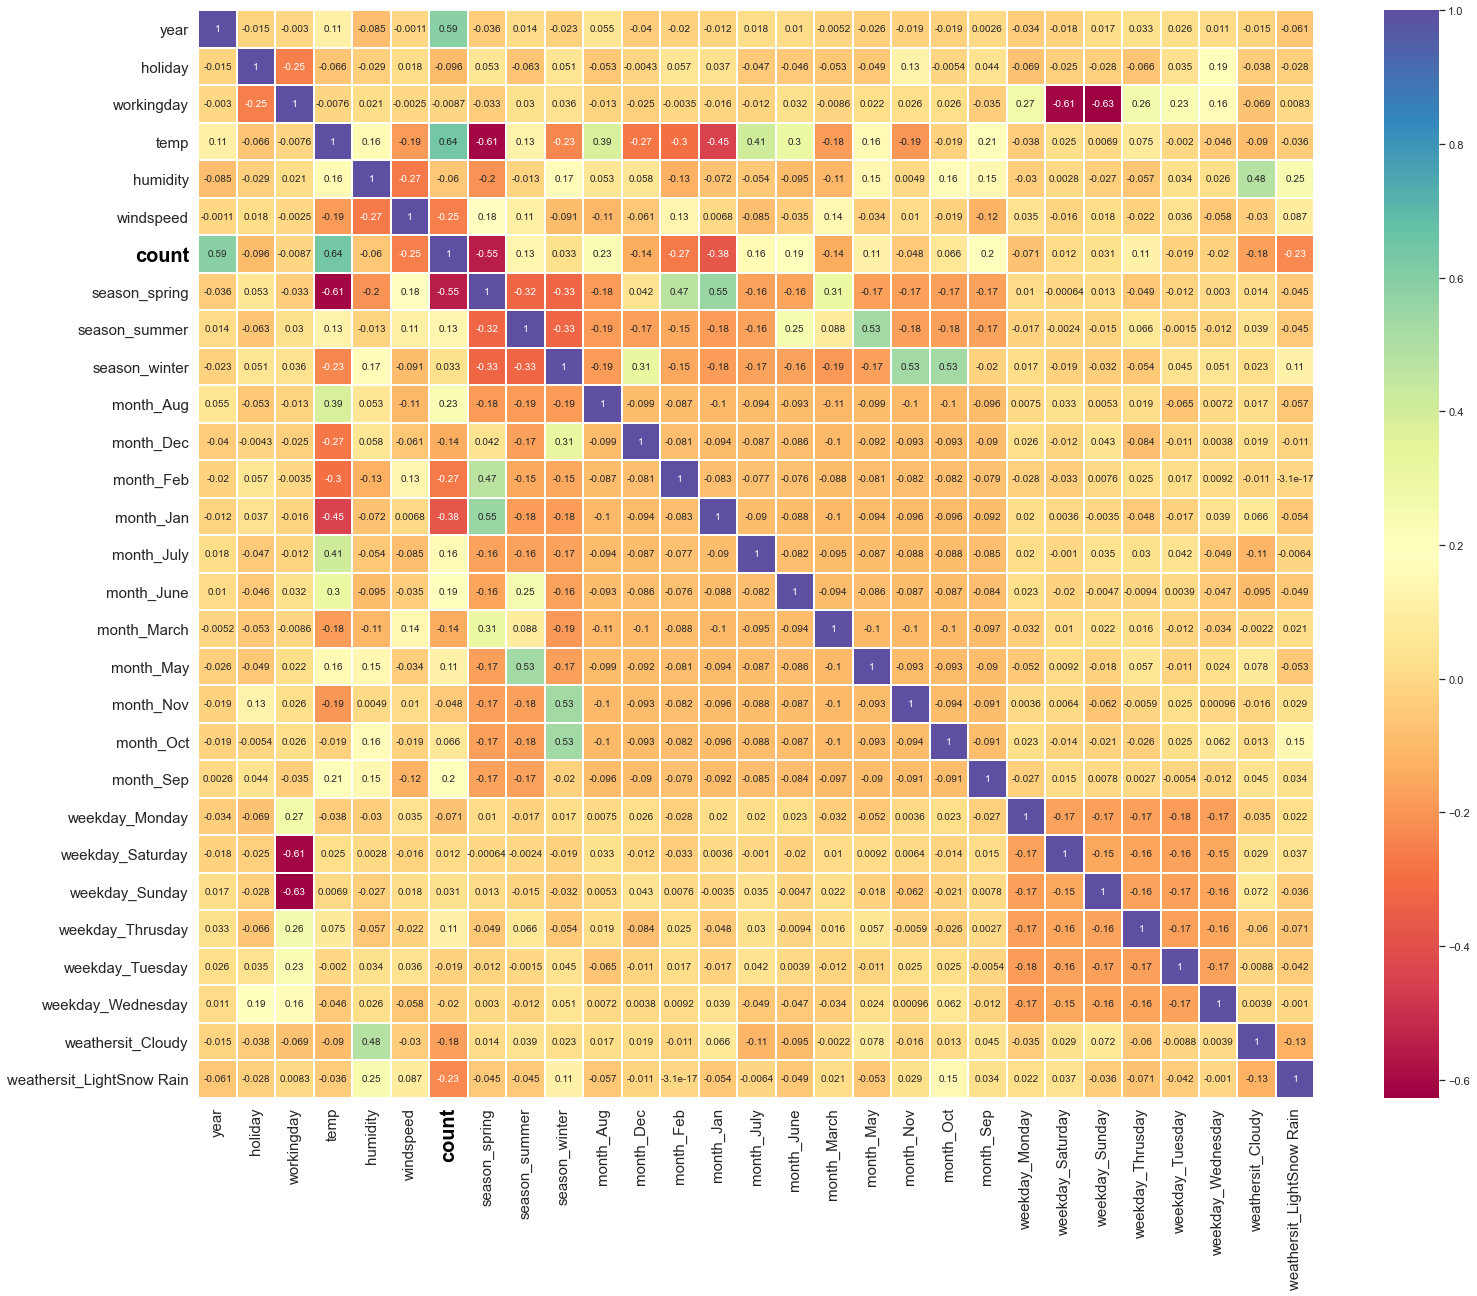

In [1347]:
plt.figure(figsize = (25,20))
ax =sns.heatmap(df_model_train.corr(), annot = True, cmap="Spectral", fmt='.2g',linewidths=1)
plt.yticks(size=15)
plt.xticks(size=15)
# plt.show()
for lab in ax.get_yticklabels():
    text =  lab.get_text()
    if text == 'count': # lets highlight row 2
        # set the properties of the ticklabel
        lab.set_weight('bold')
        lab.set_size(20)
        lab.set_color('black')

for lab in ax.get_xticklabels():
    text =  lab.get_text()
    if text == 'count': # lets highlight row 2
        # set the properties of the ticklabel
        lab.set_weight('bold')
        lab.set_size(20)
        lab.set_color('black')


Inferences

   - workingday variable has high negative correlation with Sat & Sun (where workingday =0)

   - season_spring is highly negatively correlated with count and temp.

   - temp and count has strong correlation.

   - weathersit_cloudy and humidity has moderate correlation

We can see that temperature,Summer season,June to October months are in good correlation with the 'count' variable. And seem to have good influence on the number of bike rentals.


#### 6.3 Splitting the data into X and y train

In [1348]:
y_train = df_model_train.pop('count')

In [1349]:
X_train = df_model_train

In [1350]:
print('Count as Target variable (ytrain)')
pd.DataFrame(y_train.head())

Count as Target variable (ytrain)


,count
653,7534
576,7216
426,4066
728,1796
482,4220


In [1351]:
X_train.head()

,year,holiday,workingday,temp,humidity,windspeed,season_spring,season_summer,season_winter,month_Aug,...,month_Oct,month_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Cloudy,weathersit_LightSnow Rain
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
728,1,0,1,0.245101,0.498067,0.663106,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0


### 7. Training Model
#### Model 1
Considering all the variables

In [1352]:
# Add Constant
X_train_sm = sm.add_constant(X_train)
# create a fitted model in one line
lr_1 = sm.OLS(y_train,X_train_sm).fit()
print('Model 1 summary')
print(lr_1.summary())

Model 1 summary
                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     98.04
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          4.33e-179
Time:                        21:50:44   Log-Likelihood:                -4102.0
No. Observations:                 510   AIC:                             8262.
Df Residuals:                     481   BIC:                             8385.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const 

From Above P values:

year, workingday, temp, humidity, windspeed, spring, summer, winter, Sep, Sunday, Saturday, Cloudy, LightSnow Rain are statistically significant
Recursive Feature Elimination

RFE is an efficient approach for eliminating features from a training dataset for feature selection.

Using RFE we will select top 15 features which mostly describe our dependent/target variables


In [1353]:
from sklearn.feature_selection import RFE
lm = LinearRegression()
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [1354]:
#List of variables selected
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('month_Aug', False, 9),
 ('month_Dec', True, 1),
 ('month_Feb', False, 2),
 ('month_Jan', True, 1),
 ('month_July', True, 1),
 ('month_June', False, 13),
 ('month_March', False, 14),
 ('month_May', False, 6),
 ('month_Nov', True, 1),
 ('month_Oct', False, 11),
 ('month_Sep', True, 1),
 ('weekday_Monday', False, 8),
 ('weekday_Saturday', False, 4),
 ('weekday_Sunday', False, 5),
 ('weekday_Thrusday', False, 12),
 ('weekday_Tuesday', False, 7),
 ('weekday_Wednesday', False, 10),
 ('weathersit_Cloudy', True, 1),
 ('weathersit_LightSnow Rain', True, 1)]

In [1355]:
#Columns where RFE support is True
feature = X_train.columns[rfe.support_]
feature = list(feature)
feature

['year',
 'holiday',
 'temp',
 'humidity',
 'windspeed',
 'season_spring',
 'season_summer',
 'season_winter',
 'month_Dec',
 'month_Jan',
 'month_July',
 'month_Nov',
 'month_Sep',
 'weathersit_Cloudy',
 'weathersit_LightSnow Rain']

In [1356]:
#Columns where RFE support is False
col = X_train.columns[~rfe.support_]
col =list(col)

In [1357]:
col

['workingday',
 'month_Aug',
 'month_Feb',
 'month_June',
 'month_March',
 'month_May',
 'month_Oct',
 'weekday_Monday',
 'weekday_Saturday',
 'weekday_Sunday',
 'weekday_Thrusday',
 'weekday_Tuesday',
 'weekday_Wednesday']

#### Model 2

Build using 15 Featured Variables using Statsmodel for detail analysis and further optimization of the model

In [1358]:
# Adding constant as statsmodel wont provide constant by default and assumes line to be passed through the origin
X_train_2 = sm.add_constant(X_train[feature])

In [1359]:
lr = sm.OLS(y_train,X_train_2).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          3.34e-189
Time:                        21:50:45   Log-Likelihood:                -4111.1
No. Observations:                 510   AIC:                             8254.
Df Residuals:                     494   BIC:                             8322.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

The difference b/w Adj. Rsquare and Rsquare score is 0.005 which is very less

Nov and Dec has high p-value among selected variables

Let's check VIF method to further justify this model.

#### VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating VIF is:
##### VIFi=1/1−Ri2


In [1360]:
# Creating dataframe to store a VIF information
X_train_vif = X_train[feature]
vif1=pd.DataFrame()
vif1['features'] = X_train_vif.columns
vif1['VIF'] = [variance_inflation_factor(X_train[feature].values,i) for i in range(15)]
vif1['VIF'] = round(vif1['VIF'], 2)
vif1 = vif1.sort_values(by = "VIF", ascending = False).reset_index(drop=True)
vif1

,features,VIF
0,humidity,30.94
1,temp,17.80
2,windspeed,4.72
3,season_spring,4.37
4,season_winter,4.06
5,season_summer,2.81
6,weathersit_Cloudy,2.32
7,year,2.09
8,month_Nov,1.83
9,month_Jan,1.75


#### The Rules to eleminate the Features

   - High p-value and High VIF

   - High p-value and Low VIF

   - low p-value and High VIF


Since the Dec have high p-value and low VIF, so dropping the Dec column as it is insignificant in presence of others variables

In [1361]:
feature.remove('month_Dec')

Since, to get the better model we need to repeat the above step so, lets create a function to perform the above operation

In [1362]:
def get_model(cnt,feature,X_train,final=False):
    global X_train_sm1
    global lr
    global vif
    # add_constant
    X_train_sm1 = sm.add_constant(X_train[feature])
    # fit straight line
    lr = sm.OLS(y_train, X_train_sm1).fit()
    # print_summary
    print(lr.summary())
    vif='vif'+str(cnt)
    vif=pd.DataFrame()
    vif['features'] = X_train[feature].columns
    vif['VIF'] = [variance_inflation_factor(X_train[feature].values,i) for i in range(X_train[feature].shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif= vif.sort_values('VIF', ascending=False).reset_index(drop=True)
    print('-------------------------------------------------------------------------------')
    print('VIF'.center(75))
    print('===============================================================================')
    print(vif)

#### Model 3

In [1363]:
get_model(3,feature,X_train)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.4
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          2.25e-189
Time:                        21:50:46   Log-Likelihood:                -4113.4
No. Observations:                 510   AIC:                             8257.
Df Residuals:                     495   BIC:                             8320.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Adjusted R2 Score gets reduced by 0.001, which is very reliable in terms of eliminating the Dec column

Since the Jan have high p-value and low VIF, so dropping the Jan column as it is insignificant in presence of others variables


#### Model 4

In [1364]:
feature.remove('month_Jan')
get_model(4,feature,X_train)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     204.7
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          9.74e-190
Time:                        21:50:46   Log-Likelihood:                -4115.3
No. Observations:                 510   AIC:                             8259.
Df Residuals:                     496   BIC:                             8318.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Adjusted R2 Score gets reduced by 0.001, which is very reliable in terms of eliminating the Jan column

All others variables are significant. So, let's drop the feature having very high VIF value (humidity)

#### Model 5

In [1365]:
feature.remove('humidity')
get_model(5,feature,X_train)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.5
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          1.76e-186
Time:                        21:50:46   Log-Likelihood:                -4125.8
No. Observations:                 510   AIC:                             8278.
Df Residuals:                     497   BIC:                             8333.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Adjusted R2 Score gets reduced by 0.007 (0.7%)

Since the NOv have high p-value and low VIF, so dropping the Nov column as it is insignificant in presence of others variables

Let's try dropping Nov and observed the change in the parameters.


#### Model 6

In [1366]:
feature.remove('month_Nov')
get_model(6,feature,X_train)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          2.40e-187
Time:                        21:50:46   Log-Likelihood:                -4126.6
No. Observations:                 510   AIC:                             8277.
Df Residuals:                     498   BIC:                             8328.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

There is no change in R2 and Adjusted R2 Score.

All the features have low p-value So, again we will consider the VIF value.

Let's try dropping temp value and observed the change in the parameters as the temp feature has bit high VIF

#### Model 7

In [1367]:
feature.remove('temp')
get_model(7,feature,X_train)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     161.1
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          3.17e-149
Time:                        21:50:46   Log-Likelihood:                -4219.5
No. Observations:                 510   AIC:                             8461.
Df Residuals:                     499   BIC:                             8508.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

There is a reduction in Adjusted R2 Score of 1.7%, so we will proceed further by keeping temp into our final model

And We wil drop the July column and evaluate the model because of negative corelation and high p-value.

#### Model 8

In [1368]:
feature.append('temp')

In [1369]:
feature.remove('month_July')
get_model(8,feature,X_train)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     249.2
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          7.36e-187
Time:                        21:50:46   Log-Likelihood:                -4130.6
No. Observations:                 510   AIC:                             8283.
Df Residuals:                     499   BIC:                             8330.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Adjusted R2_score changes by 1.7%, and wont affect our model

Now, we will eliminate the holiday column as all other variables except holiday has lowest p-value and VIF.


#### Model 9

In [1370]:
feature.remove('holiday')
get_model(9,feature,X_train)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     268.6
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          3.55e-185
Time:                        21:50:47   Log-Likelihood:                -4137.5
No. Observations:                 510   AIC:                             8295.
Df Residuals:                     500   BIC:                             8337.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

The Adjusted R-Square gets reduced by 0.004 or 0.4% which again won't affect our model also, all other variable have high statistical significance

Now, if we look to correlation coefficient we find a negative coefficient among all the features windspeed and LightSnow Rain have high negative coefficient and also th VIF value for the windspeed is high.

So. let's try dropping windspeed an evaluate the model


#### Model 10

In [1371]:
feature.remove('windspeed')
get_model(10,feature,X_train)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     279.3
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          3.09e-179
Time:                        21:50:47   Log-Likelihood:                -4154.4
No. Observations:                 510   AIC:                             8327.
Df Residuals:                     501   BIC:                             8365.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

On removing Windspeed

- R-square get change from 0.829 to 0.817 with the difference of 0.012 (1.2%)

- Adj. R-square get change from 0.826 to 0.814 with the difference of 0.012 (1.2%)

So, now the p-value and the VIF of the features are within the acceptable range

- A low p-value (< 0.05) indicates that we can reject the null hypothesis.

- With VIF values less than 5, we are in good shape, and can proceed with our regression without having multicolinearity

- We have the R-square value of 0.826 or 82.6%

- The adjusted R-squared came to be 0.823 or 82.3%. The low differences between R-square and the adj. R-square signifies that all the variables in the model are describing our data points

Also, let's check by removing temp and keeping windspeed into the model.


#### Model 11

In [1372]:
feature.append('windspeed')
feature.remove('temp')
get_model(11,feature,X_train)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     196.7
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          3.21e-149
Time:                        21:50:47   Log-Likelihood:                -4225.0
No. Observations:                 510   AIC:                             8468.
Df Residuals:                     501   BIC:                             8506.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

As we can see, for the above model on removing temp variable and keeping windspped leds to huge drop in R-Square and adj. R-square which is about (0.5.8%) and (10 %) respectively.

In [1373]:
feature.append('temp')
feature.remove('windspeed')
get_model(8,feature,X_train)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     279.3
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          3.09e-179
Time:                        21:50:47   Log-Likelihood:                -4154.4
No. Observations:                 510   AIC:                             8327.
Df Residuals:                     501   BIC:                             8365.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

#### We will move with the model 8 as our final model

p-Values for all variables are < 0.05 All values of VIF are < 5

The number of variables are 10 excluding the constant which has given the desired R-squared, p value and VIF

R-squared: 0.833

Adj. R-Square: 0.830

### 8. Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let's plot the histogram of the error terms and see what it looks like.


In [1374]:
# residual = y_pred - y_train
# y_train = y_train.reshape(y_train.shape[0])

In [1375]:
y_train.shape

(510,)

In [1376]:
X_train_sm1.head()

,const,year,season_spring,season_summer,season_winter,month_Sep,weathersit_Cloudy,weathersit_LightSnow Rain,temp
653,1.0,1,0,0,1,0,0,0,0.509887
576,1.0,1,0,0,0,0,0,0,0.815169
426,1.0,1,1,0,0,0,1,0,0.442393
728,1.0,1,1,0,0,0,0,0,0.245101
482,1.0,1,0,1,0,0,1,0,0.395666


#### Normal distribution of the Error term around mean 0


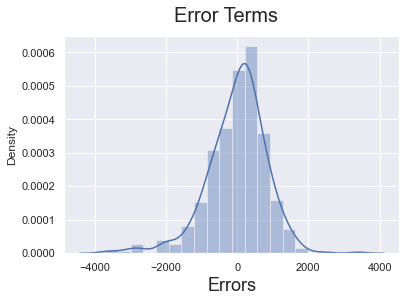

In [1377]:
y_pred = lr.predict(X_train_sm1)

fig = plt.figure()
sns.distplot((y_train - y_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)
plt.show()

The errors terms are normally Distributed with mean around 0

#### Homoscedasticity

Homoscedasticity means that the residuals have constant variance no matter the level of the dependent variable.


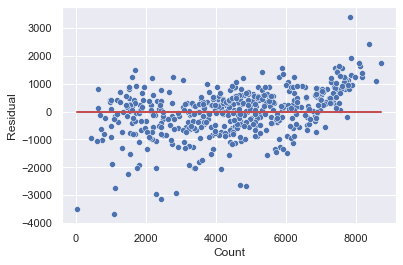

In [1378]:
residual = y_train - y_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

Insight:

There is no visible pattern in residual values, thus homoscedacity is well preserved


#### Normality of Error terms

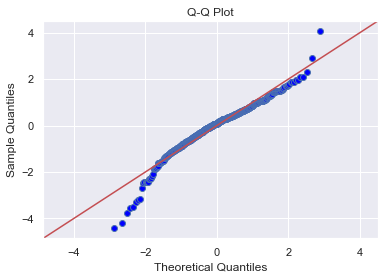

In [1379]:
sm.qqplot((y_train - y_pred), fit=True, line='45')
plt.title('Q-Q Plot')
plt.show()

### 9. Predictions and Evaluations on Test Set

In [1380]:
df_model_test.head()

,year,holiday,workingday,temp,humidity,windspeed,count,season_spring,season_summer,season_winter,...,month_Oct,month_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Cloudy,weathersit_LightSnow Rain
184,0,1,0,29.793347,63.7917,5.459106,6043,0,0,0,...,0,0,0,0,0,0,0,1,1,0
535,1,0,1,32.082500,59.2083,7.625404,6211,0,1,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,19.270000,81.2917,13.250121,2659,0,0,1,...,1,0,0,1,0,0,0,0,1,0
221,0,0,1,31.433347,42.4167,13.417286,4780,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,29.315000,30.5000,19.583229,4968,0,1,0,...,0,0,0,1,0,0,0,0,0,0


Scaling

Apply scaler() to all numeric variables in test dataset.

- Note: we will only use scaler.transform, as we want to use the metrics that the model learned from the training data to be applied on the test data.

In other words, we want to prevent the information leak from train to test dataset.


In [1381]:
df_model_test.columns

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'count', 'season_spring', 'season_summer', 'season_winter', 'month_Aug',
       'month_Dec', 'month_Feb', 'month_Jan', 'month_July', 'month_June',
       'month_March', 'month_May', 'month_Nov', 'month_Oct', 'month_Sep',
       'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday',
       'weekday_Thrusday', 'weekday_Tuesday', 'weekday_Wednesday',
       'weathersit_Cloudy', 'weathersit_LightSnow Rain'],
      dtype='object')

In [1382]:
df_model_test[variables] = scaler.transform(df_model_test[variables])

In [1383]:
df_model_test.head()

,year,holiday,workingday,temp,humidity,windspeed,count,season_spring,season_summer,season_winter,...,month_Oct,month_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Cloudy,weathersit_LightSnow Rain
184,0,1,0,0.831783,0.657364,0.084219,6043,0,0,0,...,0,0,0,0,0,0,0,1,1,0
535,1,0,1,0.901354,0.610133,0.153728,6211,0,1,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.837699,0.334206,2659,0,0,1,...,1,0,0,1,0,0,0,0,1,0
221,0,0,1,0.881625,0.437098,0.339570,4780,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.314298,0.537414,4968,0,1,0,...,0,0,0,1,0,0,0,0,0,0


#### 9.2 Creating X_test and y_test dataset


In [1384]:
y_test = df_model_test.pop('count')
X_test = df_model_test

In [1385]:
# Add Constant
X_test_sm = sm.add_constant(X_test[feature])
# create a fitted model in one line
lr_test = sm.OLS(y_test,X_test_sm).fit()
y_test_pred = lr_test.predict(X_test_sm)

In [1386]:
#MSE
print('Mean Square Error: {}'.format(np.sqrt(mean_squared_error(y_test, y_test_pred))))

r_squared = r2_score(y_test, y_test_pred)
print('R Square: {}'.format(r_squared))

Adj_r2=1-(1-0.8201349110540019)*(11-1)/(11-1-1)
print('Adj. R Square: {}'.format(Adj_r2))

Mean Square Error: 814.9152051048798
R Square: 0.8149325140353986
Adj. R Square: 0.8001499011711133


Since, the R2_score for train and test datasets are approximately same

#### 9.3 Model Evaluation

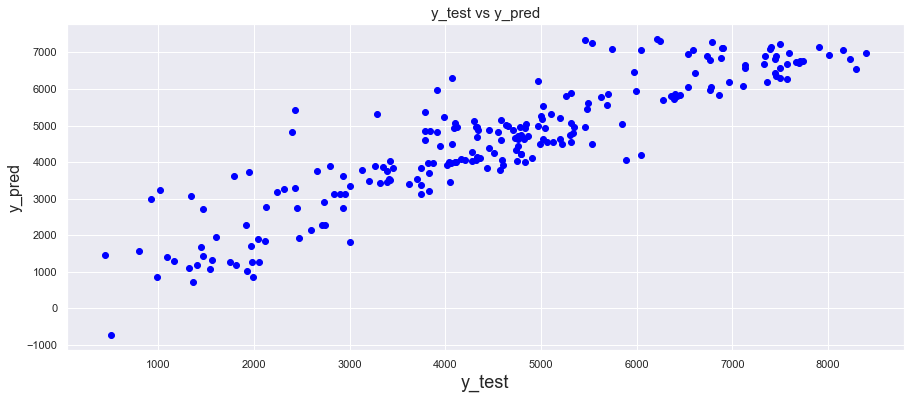

In [1387]:
# Plotting y_test and y_pred to understand the spread.
plt.figure(figsize=(15,6))
plt.scatter(y_test,y_test_pred,color='blue')
plt.title('y_test vs y_pred', fontsize=15) 
plt.xlabel('y_test', fontsize=18) 
plt.ylabel('y_pred', fontsize=16)
plt.show()

In [1388]:
from math import sqrt
round(sqrt(mean_squared_error(y_test, y_test_pred)),4)

814.9152

In [1389]:
r_squared = r2_score(y_test, y_test_pred)
print('R Square: {}'.format(r_squared))

Adj_r2=1-(1-0.8201349110540019)*(11-1)/(11-1-1)
print('Adj. R Square: {}'.format(Adj_r2))

R Square: 0.8149325140353986
Adj. R Square: 0.8001499011711133


In [1390]:
#RMSE
print('Root Mean Square Error: {}'.format(np.sqrt(mean_squared_error(y_test, y_test_pred))))
#AMSE
print('Mean Absolute Error: {}'.format(np.sqrt(mean_absolute_error(y_test, y_test_pred))))

Root Mean Square Error: 814.9152051048798
Mean Absolute Error: 24.97482699054817


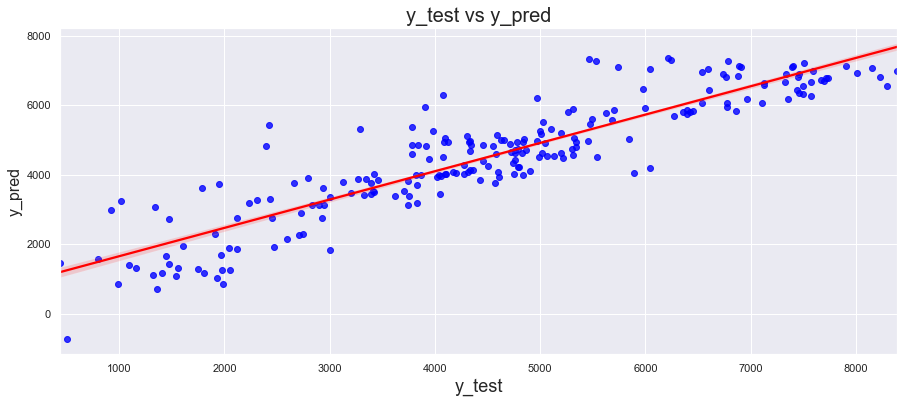

In [1391]:
#Regression plot
plt.figure(figsize=(15,6))
sns.regplot(x=y_test, y=y_test_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18) 
plt.ylabel('y_pred', fontsize=16)  
plt.show()

Hence, We reach to the decent model for the the demand for shared bikes with the significant variables

R-Square: 83.3%

Adj. R-Square: 83.0%

F-Statistics: 249.2

#### Important & Significant Features(predictors) which effect demeand for shared bikes:
- Temperature has a high coefficient of 0.4156, which means that if the temperature increases by 1 unit the demand goes up by 0.4156 units.
- During cloudy and light snow rain climate the demand for renting a shared bike goes down as these variables are negatively corealted with the negative coefficient of -0.2485 and -0.696 respectively.
- Similarly, During Summer and winter the user prefer to rent a bike so the provider can introduce some offer or increase the promotion to boost the sales and during spring the demand goes down and for boosting the sales the providers can introduce some small budget plan.
- Another Important point to infer that yearly demand is going up and the rental number is increasing by the positive coefficient of 0.2034